In [29]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
import os

# Data Preprocessing

In [4]:
data = pd.read_csv('data/dataset.csv', index_col=0)
features = ['track_name', 'track_genre', 'danceability', 'loudness', 'acousticness', 'valence', 'tempo']
X = data[features].copy()
X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)

# Standardize training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['danceability', 'loudness', 'acousticness', 'valence', 'tempo']])

# Normalize standardized data (for cosine distance metric)
X_train_cos = X_train_scaled / np.linalg.norm(X_train_scaled, axis=1)[:, np.newaxis]
cosCluster = KMeans(n_clusters=7, init="k-means++", random_state=42)

In [19]:
num_clusters = list(range(2, 15))

# Elbow Plot - Determine Optimal Number of Clusters
Create a plot of clusters against distortion (average of inertia)

## Euclidean Distance Clustering

In [30]:
distortion = []
silhouette_scores = []
for i in tqdm(num_clusters):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    fitted_model = model.fit(X_train_scaled)
    distortion.append(fitted_model.inertia_ / X_train_scaled.shape[0])
    silhouette_scores.append(silhouette_score(X_train_scaled, fitted_model.predict(X_train_scaled)))

  0%|          | 0/13 [00:00<?, ?it/s]

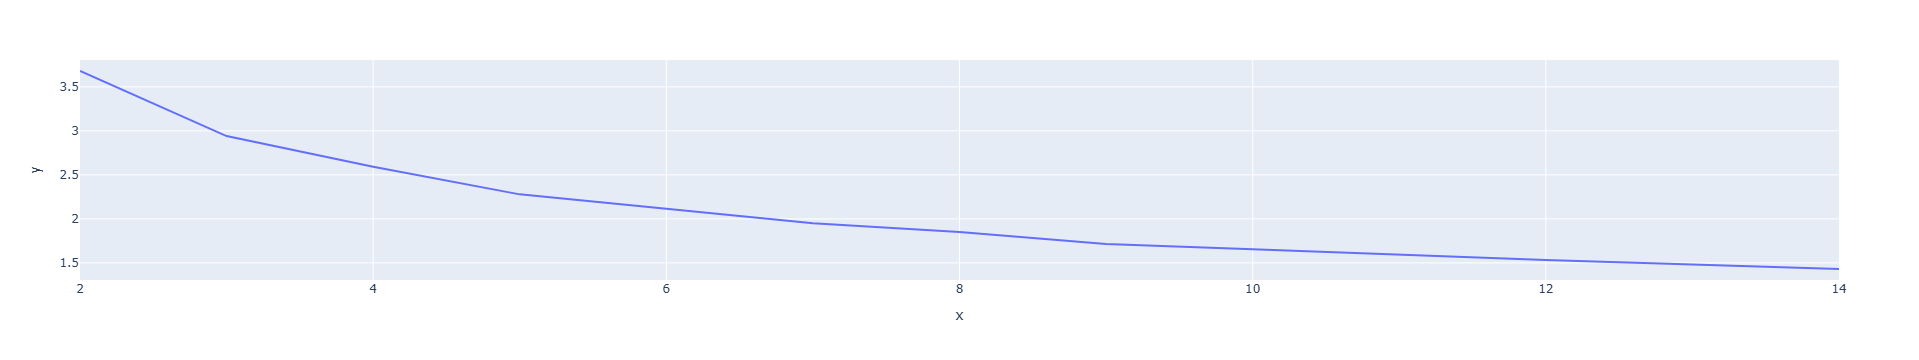

In [33]:
px.line(x=num_clusters, y=distortion)

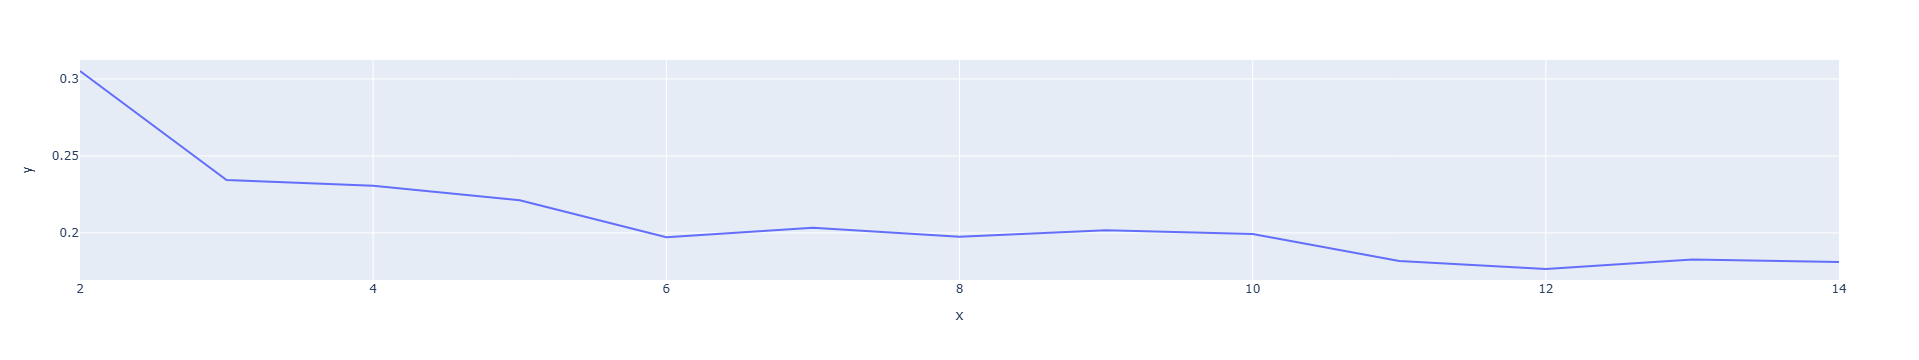

In [32]:
px.line(x=num_clusters,y=silhouette_scores)

## Cosine Distance Clustering

In [34]:
cosDistortion = []
for i in tqdm(num_clusters):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    fitted_model = model.fit(X_train_cos)
    cosDistortion.append(fitted_model.inertia_ / X_train_cos.shape[0])

  0%|          | 0/13 [00:00<?, ?it/s]

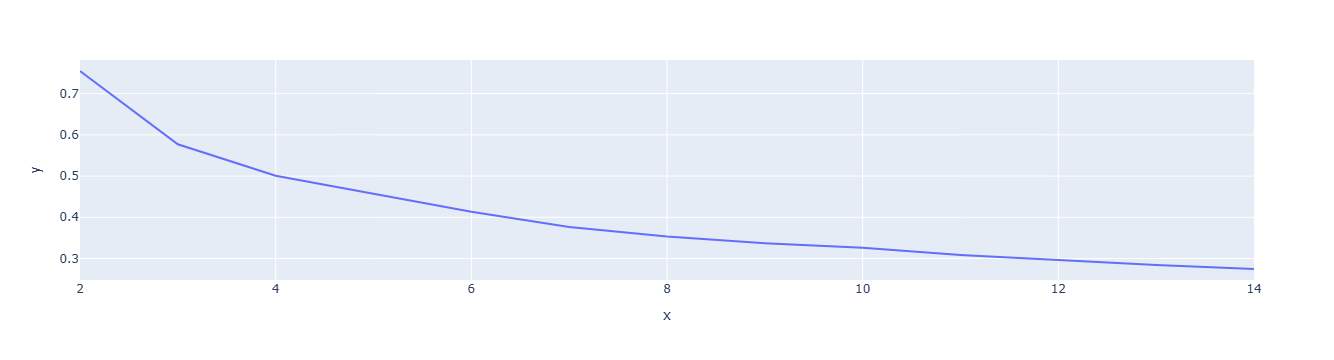

In [37]:
px.line(x=num_clusters, y=cosDistortion)

In [38]:
cosDistortion

[0.7549698156275783,
 0.5771957371491974,
 0.5007363460901066,
 0.4565823833917487,
 0.41338220670490705,
 0.3765123259175535,
 0.3532722142531309,
 0.337239268694155,
 0.325807519334983,
 0.30865691063104955,
 0.2961785122128231,
 0.28400294064887577,
 0.2744459921497999]

In [40]:
for i in range(len(cosDistortion) - 1):
    print(cosDistortion[i] - cosDistortion[i+1])

0.1777740784783809
0.07645939105909072
0.04415396269835792
0.043200176686841674
0.03686988078735354
0.023240111664422636
0.016032945558975886
0.011431749359172017
0.017150608703933423
0.012478398418226455
0.01217557156394733
0.009556948499075846
